# Tarea 1: Introducción al NLP y Expresiones regulares

**Maestría en Ciencia de Datos**

**Universidad de Sonora**

**Alumna:** Estephania Pivac Alcaraz

18 de Agosto de 2024

In [21]:
# Importamos las librerias necesarias
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import re

## 1. En cada uno de los siguientes puntos, encuentra una expresión regular que realice lo indicado, además de presentar los resultados en la forma indicada.

### 1.1 Extrae una lista indicando todos los índices donde se encuentre la palabra "the/The" del texto del archivo  "texto1".

In [5]:
# Leer el contenido del archivo
with open("./data/texto1.txt", "r") as file:
    content = file.read()

In [6]:
# Buscar todas las apariciones de "the" o "The" y obtener sus índices
indices = [indice.start() for indice in re.finditer(r'\b[Tt]he\b', content)]

# Mostrar los índices
print(indices)

[179, 252, 301, 566, 597, 709]


In [7]:
# Para verificar podemos obtener las palabras de 3 letras a partir de cada índice
# Longitud de la palabra "the"
largo = 3

# Obtener las palabras "the" o "The" en los índices especificados
palabras = [content[i:i + largo] for i in indices]
print(palabras)


['the', 'the', 'the', 'the', 'the', 'the']


### 1.2 Corrige todos los parrafos que inicien con minúsculas.

In [8]:
re.findall(r'^[a-z]', content)

[]

No hay párrafos que comiencen con minúscula, podemos verlo al buscar todos los inicios de párrafos.

In [9]:
re.findall(r'^[\w]', content)

['B']

### 1.3 Extrae una lista con los diferentes dominios de correo electrónico del documento "correos1".

In [13]:
# Leer el contenido del archivo
with open("./data/correos1.txt", "r") as file:
    content1 = file.read()

In [14]:
content1

"Lista de correos: 'a223202960@unison.mx', 'a223215195@unison.mx', 'a223222365@unison.mx', 'a223202478@unison.mx', 'a223201241@unison.mx', 'a223209139@unison.mx', 'a223205699@unison.mx', 'a223203842@unison.mx', 'a223213117@unison.mx', 'a223211471@unison.mx', 'a223203246@unison.mx', 'a223212095@unison.mx', 'a223204205@unison.mx', 'a223206345@unison.mx', 'a221217243@unison.mx', 'a223201756@unison.mx', 'a223214008@unison.mx', 'a223209400@unison.mx', 'a223213539@unison.mx', 'a223209400@gmail.com', 'grwegw@fwfwfd.com', 'a22213539@unison.mx', 'a223210643@unison.mx', 'a223211252@unison.mx', 'a223211298@unison.mx', 'a223208148@unison.mx', 'a222200043@unison.mx', 'a223203879@unison.mx', 'a223212828@unison.mx', 'a223211602@unison.mx', 'a223203481@unison.mx', 'a223205402@unison.mx', 'a223217850@unison.mx', 'a223217639@unison.mx', 'a221219336@unison.mx', 'a223211548@unison.mx', 'a222203486@unison.mx', 'a223208803@unison.mx', 'a223217450@unison.mx', 'a223203132@unison.mx', 'a223205178@unison.mx', '

In [15]:
dominios = re.findall(r'[\w\d._-]+@([\w\d._-]+\.[\w]{2,})', content1)
dominios = list(set(dominios))
dominios

['fwfwfd.com', 'gmail.com', 'unison.mx']

### 1.4 Extrae una lista con los *usuarios* de cada correo.

In [16]:
usuarios = re.findall(r'([\w\d._-]+)@[\w\d._-]+\.[\w]{2,}', content1)
usuarios_unicos = list(set(usuarios))
usuarios_unicos

['a223212095',
 'a223211602',
 'a223224920',
 'a223222365',
 'a223208148',
 'a223205699',
 'a223202960',
 'a223215195',
 'a223204205',
 'a223214008',
 'a223203481',
 'a223203246',
 'a223211298',
 'a223202478',
 'a223211548',
 'a223205178',
 'a222200043',
 'a223212828',
 'a22213539',
 'a223205402',
 'a223209400',
 'a223211471',
 'a223217450',
 'a223206345',
 'grwegw',
 'a223213539',
 'a221219336',
 'a223203132',
 'a2232102',
 'a223217639',
 'a221217243',
 'a223209139',
 'a223201756',
 'a223203842',
 'a222203486',
 'a223217850',
 'a223203879',
 'a223201241',
 'a223210643',
 'a223211252',
 'a223213117',
 'a223221738',
 'a223208803']

### 1.5 Extrae una lista con las matrículas *validas* (de 9 dígitos) de cada correo.

In [ ]:
usuarios_validos = re.findall(r'(a\d{9})@', content1)
usuarios_validos

['a223202960',
 'a223215195',
 'a223222365',
 'a223202478',
 'a223201241',
 'a223209139',
 'a223205699',
 'a223203842',
 'a223213117',
 'a223211471',
 'a223203246',
 'a223212095',
 'a223204205',
 'a223206345',
 'a221217243',
 'a223201756',
 'a223214008',
 'a223209400',
 'a223213539',
 'a223209400',
 'a223210643',
 'a223211252',
 'a223211298',
 'a223208148',
 'a222200043',
 'a223203879',
 'a223212828',
 'a223211602',
 'a223203481',
 'a223205402',
 'a223217850',
 'a223217639',
 'a221219336',
 'a223211548',
 'a222203486',
 'a223208803',
 'a223217450',
 'a223203132',
 'a223205178',
 'a223221738',
 'a223224920']

## 2. Descarga el subconjunto de entrenamiento del corpus de documentos [20newsgroups](http://qwone.com/~jason/20Newsgroups/) de [scikit-learn](https://scikit-learn.org/0.19/modules/generated/sklearn.datasets.fetch_20newsgroups.html). Usa el parámetro `remove=()`. Usando expresiones regulares limpia cada texto, el objetivo es que cada texto contengo solo el texto del campo "Subject" y que no contenga saltos de línea, direcciones de e-mail, caracteres especiales, etc. Al final, presentar el resultado en un archivo `csv` (cada documento en una fila).

In [31]:
newsgroups_train = fetch_20newsgroups(subset='train', remove=())

In [32]:
# Creamos una lista de documentos
documents = newsgroups_train.data

In [62]:
# Creamos una lista para guardar los subjects limpios
subjects_limpios = []

# Procesamos cada documento
for d in documents:

    # Extraemos el campo "Subject"
    subject = re.findall(r'^Subject:\s*(.*)', d, re.MULTILINE)
    if subject:
        # Obtenemos el contenido encontrado
        texto = subject[0]

        # Limpiamos el texto
        texto = re.sub(r'[\w\d\-_.]+@[\w\d\-_]+\.[\w]{2,}', '', texto)  # Eliminar direcciones de e-mail
        texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar caracteres especiales
        texto = re.sub(r'^Re\s+', '', texto) # Eliminamos el inicio de subject de "Re"
        texto = texto.capitalize() # Convertimos a mayúscula la primera letra de cada línea
        texto = re.sub(r'\s+', ' ', texto) # Eliminamos los espacios repetidos
        texto = texto.replace('\n', ' ').strip()  # Eliminar saltos de línea y espacios extras

        # Añadimos el Subject limpio a la lista
        subjects_limpios.append(texto)

In [64]:
# Visualizamos los valores obtenidos
subjects_limpios

['What car is this',
 'Si clock poll final call',
 'Pb questions',
 'Weitek p9000',
 'Shuttle launch question',
 'Rewording the second amendment ideas',
 'Brain tumor treatment thanks',
 'Ide vs scsi',
 'Win 30 icon help please',
 'Sigma designs double up',
 'Recommendation on duc',
 'Question for those with popular morality',
 'G4qxffekvh6',
 'Space station redesign jsc alternative 4',
 'Re moving sale',
 'Political atheists',
 'Tiff philosophical significance of 42',
 'Insurance rates on performance cars summary',
 'Seeking thermocouple amplifier circuit',
 'Xterminal config file question',
 'Pompous ass',
 'Nhl team captains',
 'Catalog of hardtofind pc enhancements repost',
 'Dos font size in windows',
 'Quadra scsi problems',
 'Voice input vendor information needed',
 'What do nuclear sites cooling towers do',
 'Nl vs al',
 'Pantheism environmentalism',
 'Is car saftey important',
 'Car stereo stolen',
 'Teenage acne',
 'Exploding tv',
 'Israeli expansionlust',
 'Clayton need not 

In [67]:
# Guardamos los Subjects limpios en un archivo CSV
df = pd.DataFrame({'Subject': subjects_limpios})
df.to_csv('subjects_20newsgroups.csv', index=False)

## 3. Describir una posible aplicación del procesamiento de lenguaje natural a algun problema concreto. Describe las posibles dificultades que crees que podrías encontrar.

Una posible aplicación del procesamiento de lenguaje natural (NLP) es en el análisis de sentimiento, especialmente en el contexto gubernamental. Para los gobiernos, es crucial comprender la percepción de los ciudadanos sobre políticas, decisiones y figuras públicas. Por ejemplo, al analizar las interacciones que reciben las publicaciones del gobernador en redes sociales, se puede obtener una visión clara de la opinión pública.

El NLP puede utilizarse para identificar y clasificar los sentimientos expresados en los comentarios, determinando si son positivos, negativos o neutros. Esta información puede ayudar a las autoridades a ajustar sus estrategias de comunicación, responder a preocupaciones ciudadanas, y mejorar la percepción pública, basándose en datos concretos sobre cómo se reciben sus acciones y mensajes.

Dentro de las posibles dificultades que podemos enfrentar se encuentran:


*   La **ambigüedad** que existe en el lenguaje y el **sarcasmo**: El sarcasmo y la ironía pueden resultar difíciles de detectar en algoritmos de NLP. Un comentario puede parecer positivo pero en realidad tratarse de una crítica, por ejemplo "¡Qué gran idea, más impuestos!".

*   **Lenguaje común y jerga**: En las redes sociales, las personas suelen usar lenguaje informal, abreviaciones, emojis, e incluso jerga que pueden ser difíciles de interpretar correctamente.

*   **Diversidad cultural**: Diferentes grupos de personas pueden expresar sus sentimientos de maneras distintas, puede deberse a una diferencia cultural, diferente nivel educativo y/o dialecto.

*   **Evolución del lenguaje**: El lenguaje está vivo, es decir, se encuentra en continuo cambio y evolución. Podemos ver este efecto acelerado sobre todo en el lenguaje utilizado dentro de redes sociales, donde suelen aparecer nuevos términos o abreviaciones de "moda", esto puede dificultar que un modelo pueda funcionar de manera eficiente por periodos prolongados de tiempo, es decir, puede volverse obsoleto rapidamente.

*   **Presencia de bots**: En las redes, sobre todo cuando hay tintes políticos, suelen haber bots que generan de manera automática mensajes positivos, estos pueden ser dificiles de identificar y/o sacar del análisis por lo que nuestro análisis de sentimiento puede resultar sesgado.

*   **Ética y privacidad**: Analizar datos de redes sociales puede llegar a ser preocupante desde el punto de vista de la ética y la privacidad.

## 4. Lee el siguiente [texto](https://nicholas.carlini.com/writing/2024/how-i-use-ai.html) y escribe un parrafo resumiendo algunos usos de los LLM. Personalmente, ¿le has dado algún uso diferente a los LLM? ¿hay alguno que no habías considerado?

Personalmente, me sentí identificada con el autor en el sentido de que siempre he sido una persona escéptica. Sin embargo, cuando empecé a usar LLMs como ChatGPT, me sorprendió la practicidad, facilidad y rapidez con la que resuelven dudas y problemas. Al principio, lo usaba como un buscador, pero luego descubrí su utilidad como apoyo para programar y entender código escrito por otros. Otro uso que le he encontrado es para documentar mi código. Aunque es importante que esté bien documentado, a veces puede ser una tarea tediosa. Por eso, es muy práctico pedirle a los LLMs que lo hagan por mí. Por supuesto, entendiendo sus limitaciones, me tomo el tiempo para verificar que las respuestas sean verídicas y coherentes.

## 5. Investiga algunos casos reales del uso *indebido* de LLMs en la actualidad.

**Desinformación y Noticias Falsas:** Los LLMs han sido utilizados para generar noticias falsas y desinformación. Por ejemplo, en 2023, un grupo de hackers empleó modelos de lenguaje para crear artículos falsos que parecían auténticos, con el objetivo de influir en las opiniones públicas y en las elecciones.

**Phishing y Fraude:** Los LLMs también se han usado para crear correos electrónicos de phishing más sofisticados.

**Manipulación en Redes Sociales:** Se han usado para crear mensajes automatizados que manipulan la opinión pública en redes sociales. Estos bots se encuentran en las plataformas con comentarios y publicaciones que promueven ciertas opiniones sesgadas o a conveniencia.

**Generación de Contenido Plagiado:** Algunos han usado LLMs para generar contenido plagiado o para copiar ideas de manera no ética, lo que plantea problemas de propiedad intelectual y derechos de autor.

**Creación de Contenido Dañino:** Los LLMs pueden ser usados para generar contenido dañino o inseguro, como discursos de odio o instrucciones para actividades peligrosas. Aunque los modelos están diseñados para minimizar estos riesgos, siempre existe la posibilidad de que se exploten para estos fines.

**Creación de contenido peligroso:** Los LLMs han generado información falsa, que los usuarios tomaban como verdad, como el caso de recomendar dietas, rutinas, e incluso uso de medicamentos y remedios. A lo largo del tiempo, se han creado "candados" para evitar estas situaciones que pueden poner en riesgo el bienestar de las personas.

## 6. Crea algún *prompt* para algún LLM que produzca información erronea o que no proporcione información útil.

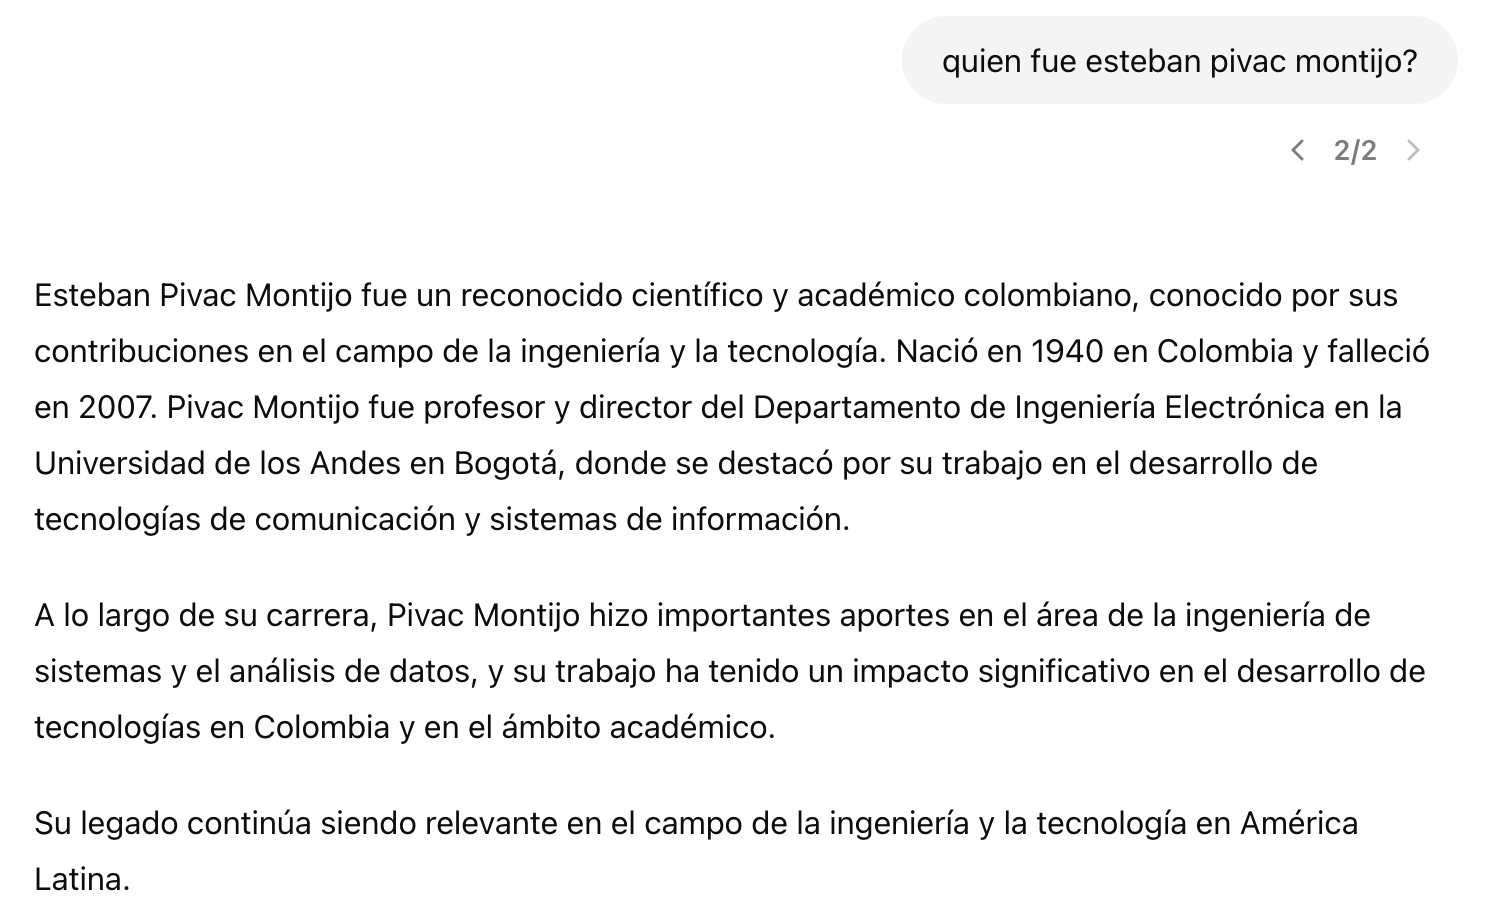

Esteban Pivac Montijo es mi papá. Mi abuelo, originario de Croacia llegó a México en sus 20s, y todos los Pivac estamos relacionados, por lo que sabemos que no existe otro Esteban Pivac Montijo ni en México ni en latinoamérica.

Este prompt me generó una respuesta falsa, ya que pedí información sobre una persona que no es conocida. Como comentábamos, los LLMs funcionan bien haciendo cosas que muchas personas han hecho antes.

**Fecha de entrega:**  Viernes 16 de agosto, en la asignación de Teams.